# STEP-1.Business Problem Understanding






























































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































## Future Prediction of brain stroke based on Machine learning

# STEP-2 Data Understanding

In [1]:
import pandas as pd                                                         
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

In [2]:
df=pd.read_csv("BrainstrokePrediction.csv")
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self_employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self_employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self_employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self_employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [3]:
df.shape

(5110, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
df["gender"].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [6]:
df["gender"]

0         Male
1       Female
2         Male
3       Female
4       Female
         ...  
5105    Female
5106    Female
5107    Female
5108      Male
5109    Female
Name: gender, Length: 5110, dtype: object

In [7]:
df["gender"].value_counts()

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

In [8]:
df["hypertension"].unique()

array([0, 1], dtype=int64)

In [9]:
df["hypertension"].value_counts()

hypertension
0    4612
1     498
Name: count, dtype: int64

In [10]:
df["heart_disease"].unique()

array([1, 0], dtype=int64)

In [11]:
df["heart_disease"].unique()

array([1, 0], dtype=int64)

In [12]:
df["heart_disease"].value_counts()

heart_disease
0    4834
1     276
Name: count, dtype: int64

In [13]:
df["ever_married"].unique()

array(['Yes', 'No'], dtype=object)

In [14]:
df["ever_married"].value_counts()

ever_married
Yes    3353
No     1757
Name: count, dtype: int64

In [15]:
df["work_type"].unique()

array(['Private', 'Self_employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [16]:
df["work_type"].value_counts()

work_type
Private          2925
Self_employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

In [17]:
df["Residence_type"].unique()

array(['Urban', 'Rural'], dtype=object)

In [18]:
df["Residence_type"].value_counts()

Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64

In [19]:
df["avg_glucose_level"].unique()

array([228.69, 202.21, 105.92, ...,  82.99, 166.29,  85.28])

In [20]:
df["avg_glucose_level"].value_counts()

avg_glucose_level
93.88     6
91.68     5
91.85     5
83.16     5
73.00     5
         ..
111.93    1
94.40     1
95.57     1
66.29     1
85.28     1
Name: count, Length: 3979, dtype: int64

In [21]:
df["bmi"].unique()

array([36.6,  nan, 32.5, 34.4, 24. , 29. , 27.4, 22.8, 24.2, 29.7, 36.8,
       27.3, 28.2, 30.9, 37.5, 25.8, 37.8, 22.4, 48.9, 26.6, 27.2, 23.5,
       28.3, 44.2, 25.4, 22.2, 30.5, 26.5, 33.7, 23.1, 32. , 29.9, 23.9,
       28.5, 26.4, 20.2, 33.6, 38.6, 39.2, 27.7, 31.4, 36.5, 33.2, 32.8,
       40.4, 25.3, 30.2, 47.5, 20.3, 30. , 28.9, 28.1, 31.1, 21.7, 27. ,
       24.1, 45.9, 44.1, 22.9, 29.1, 32.3, 41.1, 25.6, 29.8, 26.3, 26.2,
       29.4, 24.4, 28. , 28.8, 34.6, 19.4, 30.3, 41.5, 22.6, 56.6, 27.1,
       31.3, 31. , 31.7, 35.8, 28.4, 20.1, 26.7, 38.7, 34.9, 25. , 23.8,
       21.8, 27.5, 24.6, 32.9, 26.1, 31.9, 34.1, 36.9, 37.3, 45.7, 34.2,
       23.6, 22.3, 37.1, 45. , 25.5, 30.8, 37.4, 34.5, 27.9, 29.5, 46. ,
       42.5, 35.5, 26.9, 45.5, 31.5, 33. , 23.4, 30.7, 20.5, 21.5, 40. ,
       28.6, 42.2, 29.6, 35.4, 16.9, 26.8, 39.3, 32.6, 35.9, 21.2, 42.4,
       40.5, 36.7, 29.3, 19.6, 18. , 17.6, 19.1, 50.1, 17.7, 54.6, 35. ,
       22. , 39.4, 19.7, 22.5, 25.2, 41.8, 60.9, 23

In [22]:
df["bmi"].value_counts()

bmi
28.7    41
28.4    38
26.7    37
27.6    37
26.1    37
        ..
48.7     1
49.2     1
51.0     1
49.4     1
14.9     1
Name: count, Length: 418, dtype: int64

In [23]:
df["smoking_status"].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [24]:
df["smoking_status"].value_counts()

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64

In [25]:
df["stroke"].unique()

array([1, 0], dtype=int64)

In [26]:
df["stroke"].value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [28]:
continuous = ["age","avg_glucose_level","bmi"]

discrete_categorical = ["gender","hypertension","heart_disease","ever_married","work_type","Residence_type","smoking_status","stroke"]

## Exploratory Data Analysis

### For Continuous Variables

In [29]:
df[continuous].describe()

,age,avg_glucose_level,bmi
count,5110.000000,5110.000000,4909.000000
mean,43.226614,106.147677,28.893237
std,22.612647,45.283560,7.854067
min,0.080000,55.120000,10.300000
25%,25.000000,77.245000,23.500000
50%,45.000000,91.885000,28.100000
75%,61.000000,114.090000,33.100000
max,82.000000,271.740000,97.600000


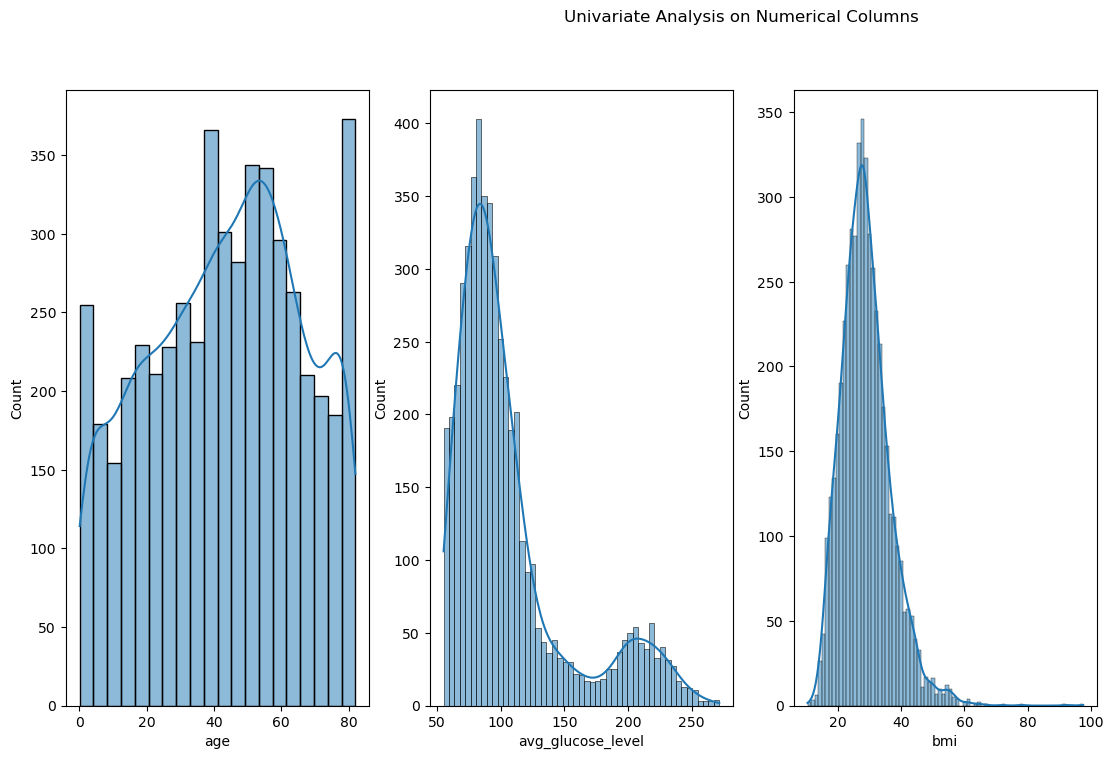

In [30]:
plt.rcParams["figure.figsize"] = (18,8)
plt.subplot(1,4, 1)
sns.histplot(df["age"],kde=True)
plt.subplot(1,4, 2)
sns.histplot(df["avg_glucose_level"],kde=True)
plt.subplot(1,4, 3)
sns.histplot(df["bmi"],kde=True)
plt.suptitle("Univariate Analysis on Numerical Columns")
plt.show()

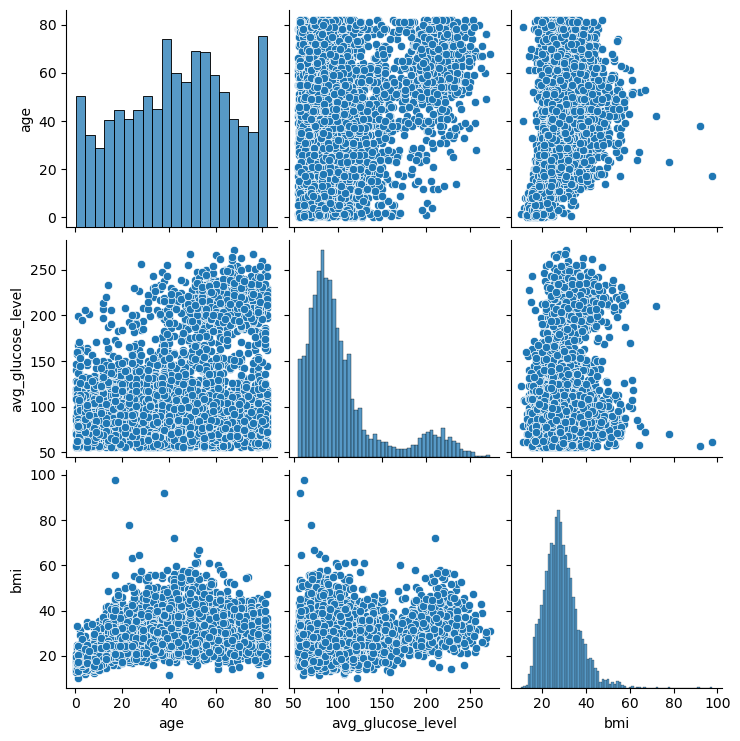

In [31]:
sns.pairplot(df[continuous])
plt.show()

In [32]:
df[continuous].corr()

,age,avg_glucose_level,bmi
age,1.000000,0.238171,0.333398
avg_glucose_level,0.238171,1.000000,0.175502
bmi,0.333398,0.175502,1.000000


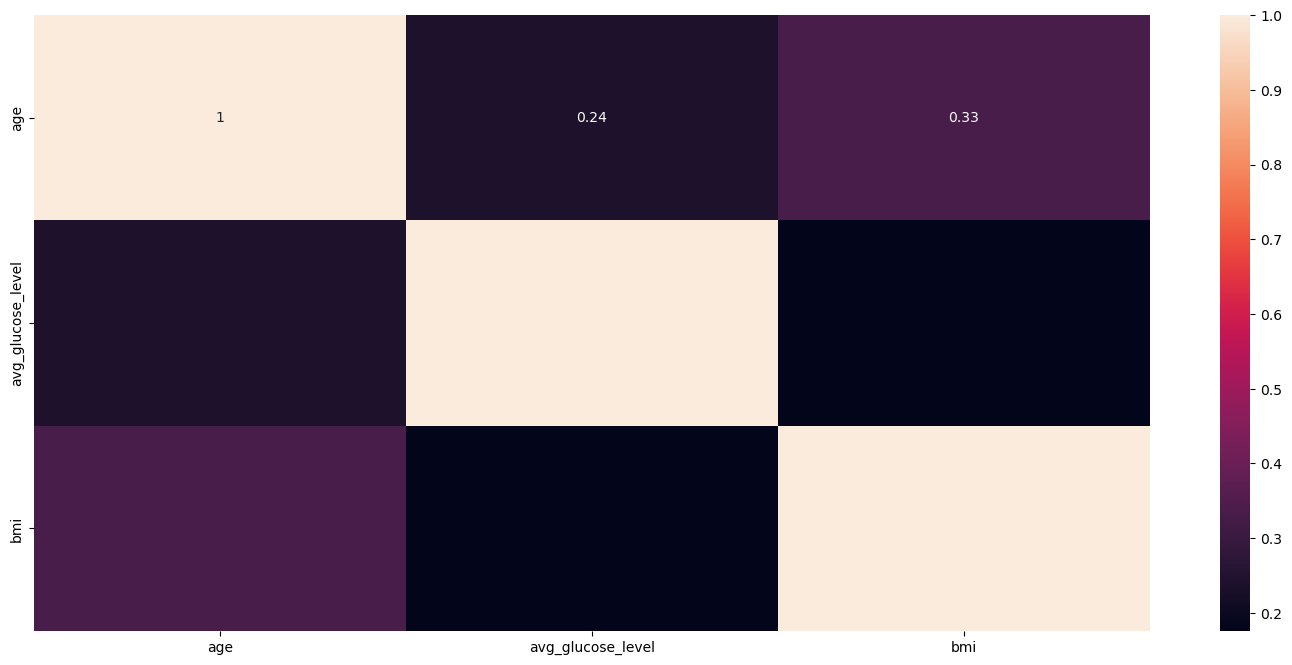

In [33]:
sns.heatmap(df[continuous].corr(),annot=True)
plt.show()

### For discrete variables

In [34]:
df[discrete_categorical].describe()

,hypertension,heart_disease,stroke
count,5110.000000,5110.000000,5110.000000
mean,0.097456,0.054012,0.048728
std,0.296607,0.226063,0.215320
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000


## Steps to be followed for data cleaning

### Check for Wrong Data

### Check for Wrong Data Format

### Check for Duplicates

In [35]:
df.duplicated().sum()

0

### Check for Missing Values

In [36]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [37]:
df.isnull().sum()/len(df)*100

id                   0.000000
gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  3.933464
smoking_status       0.000000
stroke               0.000000
dtype: float64

In [38]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

### Check for skewness

In [39]:
df[["age","avg_glucose_level","bmi"]].skew()

age                 -0.137059
avg_glucose_level    1.572284
bmi                  1.055340
dtype: float64

### Check for outliers

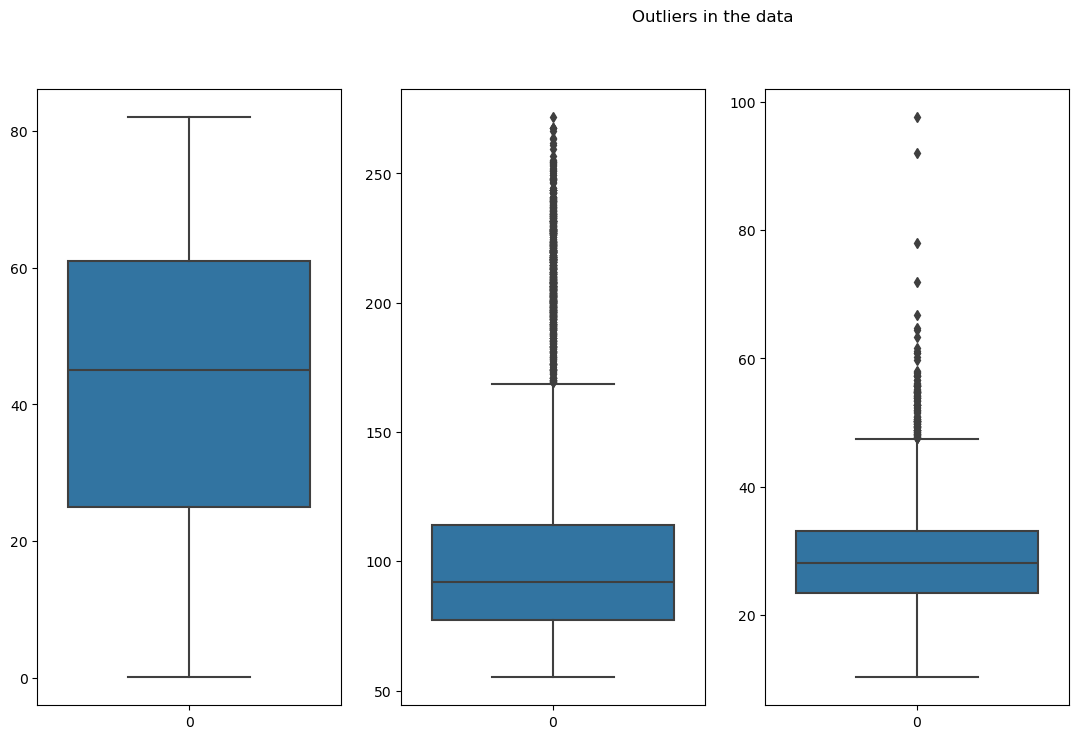

In [40]:
# Lets visualize the outliers using Boxplot
plt.subplot(1,4, 1)
sns.boxplot(df["age"])
plt.subplot(1,4, 2)
sns.boxplot(df["avg_glucose_level"])
plt.subplot(1,4, 3)
sns.boxplot(df["bmi"])
plt.suptitle("Outliers in the data")
plt.show()

# STEP-3 Data Preprocessing

## I.Data Cleaning

### No Treatment for wrong data

### No Treatment fo wrong data type

### No Treatment for duplicates

### Treating missing values

In [41]:
df.dropna(inplace=True)
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self_employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,44873,Female,81.0,0,0,Yes,Self_employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self_employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [42]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [43]:
df.drop(columns=["id"],inplace=True)
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self_employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,Female,81.0,0,0,Yes,Self_employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self_employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


### Treating Outliers

#### In this case, outliers should be retrained(if we change the values then we can't get the accurate results)


## II.Data Wrangling

### Feature Encoding

In [44]:
df["gender"] = df["gender"].replace({"Female":0,"Male":1,"Other":2})
df["ever_married"] = df["ever_married"].replace({"No":0,"Yes":1})
df["work_type"] = df["work_type"].replace({"children":0,"Govt_job":1,"Never_worked":2,"Private":3,"Self_employed":4})
df["Residence_type"] = df["Residence_type"].replace({"Rural":0,"Urban":1})
df["smoking_status"] = df["smoking_status"].replace({"never smoked":0,"formerly smoked":1,"smokes":2,"Unknown":3})

### Feature Transformations

In [45]:
from scipy.stats import boxcox
df["avg_glucose_level"], param = boxcox(df["avg_glucose_level"])
df["avg_glucose_level"]

0       0.944702
2       0.940854
3       0.943605
4       0.943678
5       0.943958
          ...   
5104    0.940652
5106    0.941973
5107    0.938822
5108    0.943474
5109    0.939075
Name: avg_glucose_level, Length: 4909, dtype: float64

In [46]:
param

-1.0551036377308682

In [47]:
df["avg_glucose_level"].skew()

0.07786948600485386

In [48]:
df["bmi"]=np.log(df["bmi"])
df["bmi"]

0       3.600048
2       3.481240
3       3.538057
4       3.178054
5       3.367296
          ...   
5104    2.923162
5106    3.688879
5107    3.421000
5108    3.242592
5109    3.265759
Name: bmi, Length: 4909, dtype: float64

In [49]:
df["bmi"].skew()

0.0011326087933931398

In [50]:
df[["age","avg_glucose_level","bmi"]].skew()

age                 -0.119070
avg_glucose_level    0.077869
bmi                  0.001133
dtype: float64

### No Feature Scaling (Because all the values are in normalized format)

In [51]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,3,1,0.944702,3.600048,1,1
2,1,80.0,0,1,1,3,0,0.940854,3.481240,0,1
3,0,49.0,0,0,1,3,1,0.943605,3.538057,2,1
4,0,79.0,1,0,1,4,0,0.943678,3.178054,0,1
5,1,81.0,0,0,1,3,1,0.943958,3.367296,1,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,0,13.0,0,0,0,0,0,0.940652,2.923162,3,0
5106,0,81.0,0,0,1,4,1,0.941973,3.688879,0,0
5107,0,35.0,0,0,1,4,0,0.938822,3.421000,0,0
5108,1,51.0,0,0,1,3,0,0.943474,3.242592,1,0


### X&y

In [52]:
X = df.drop("stroke",axis=1)
y = df["stroke"]

### Identify the best random number

In [53]:
Train = []
Test = []
CV = []
for i in range(0,101):
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)

    from sklearn.linear_model import LogisticRegression
    log_default = LogisticRegression()
    log_default.fit(X_train,y_train)

    ypred_train = log_default.predict(X_train)
    ypred_test = log_default.predict(X_test)
    from sklearn.metrics import accuracy_score
    Train.append(accuracy_score(y_train, ypred_train))
    Test.append(accuracy_score(y_test, ypred_test))

    from sklearn.model_selection import cross_val_score
    CV.append(cross_val_score(log_default, X_train, y_train, cv=5, scoring="accuracy").mean())
#Storing all results
em = pd.DataFrame({"Train":Train, "Test":Test, "CV":CV})
#Find the best random state
gm = em[(abs(em["Train"]-em["Test"])<=0.05) & (abs(em["Test"]-em["CV"])<=0.05)]
#pick the highest CV 
rs = gm[gm["CV"]==gm["CV"].max()].index.to_list()[0]
print("best random_state number:",rs)

best random_state number: 11


## III.train_test_split

In [54]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=11)

In [55]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


# STEP-4.ML Modelling

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

### 1.Logistic Regression

In [57]:
#Modelling
log_model = LogisticRegression()
log_model.fit(X_train,y_train)

#Evaluation  
ypred_train = log_model.predict(X_train)
ypred_test  = log_model.predict(X_test)

print("Train Accuracy :",accuracy_score(y_train,ypred_train))
print("cross validation score:",cross_val_score(log_model,X_train,y_train,cv=5,scoring="accuracy").mean())
print("Test Accuracy :",accuracy_score(y_test,ypred_test))
      

Train Accuracy : 0.9602750190985485
cross validation score: 0.9605296510591401
Test Accuracy : 0.9460285132382892


### 2.KNN Classifier Algorithm

In [58]:
#Hyper Parameter Tuning
estimator = KNeighborsClassifier()
param_grid = {"n_neighbors": list(range(1,50))}
knn_grid = GridSearchCV(estimator, param_grid,scoring="accuracy",cv=5)
knn_grid.fit(X_train,y_train)
knn_model = knn_grid.best_estimator_
knn_model

KNeighborsClassifier(n_neighbors=13)

In [59]:
#Modelling
knn_model = KNeighborsClassifier(n_neighbors=13)
knn_model.fit(X_train,y_train)

#Evaluation
ypred_train = knn_model.predict(X_train)
ypred_test  = knn_model.predict(X_test)

print("Train Accuracy :",accuracy_score(y_train,ypred_train))
print("cross validation score :",cross_val_score(knn_model,X_train,y_train,cv=5,scoring="accuracy").mean())
print("Test Accuracy :",accuracy_score(y_test,ypred_test))

Train Accuracy : 0.9602750190985485
cross validation score : 0.9602755222767865
Test Accuracy : 0.9460285132382892


### 3.Support Vector Machine Algorithm

In [60]:
#Hyper Parameter Tuning 
estimator = SVC()
param_grid = {"C":[0.01,0.1,1],"kernel":["linear","rbf","sigmoid","poly"]}
svm_grid = GridSearchCV(estimator,param_grid,scoring="accuracy",cv=5)
svm_grid.fit(X_train,y_train)
svm_model = svm_grid.best_estimator_
svm_model

SVC(C=0.01, kernel='linear')

In [61]:
#Modelling
svm_model = SVC(C=0.01, kernel="linear")
svm_model.fit(X_train,y_train)

#Evaluation
ypred_train = svm_model.predict(X_train)
ypred_test  = svm_model.predict(X_test)

print("Train Accuracy :",accuracy_score(y_train,ypred_train))
print("cross validation score :",cross_val_score(svm_model,X_train,y_train,cv=5,scoring="accuracy").mean())
print("Test Accuracy :",accuracy_score(y_test,ypred_test))

Train Accuracy : 0.9602750190985485
cross validation score : 0.9602751981329314
Test Accuracy : 0.9460285132382892


### 4.Decision Tree Classifier Algorithm

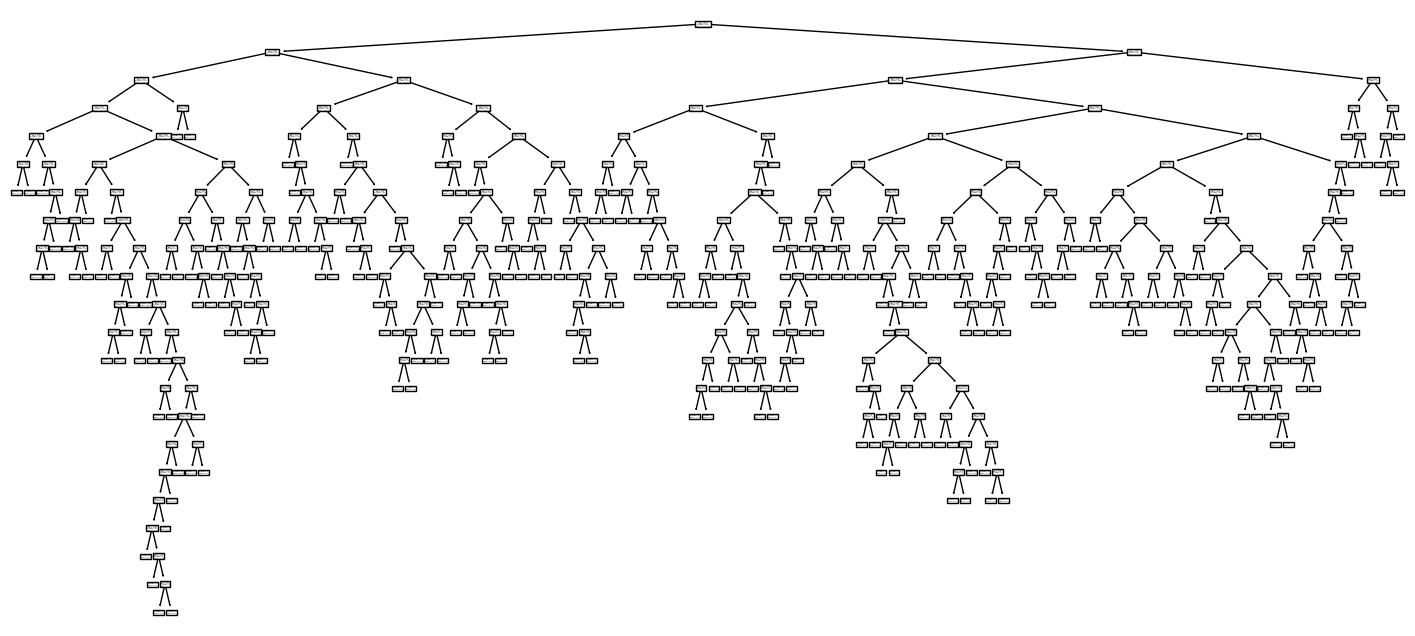

In [62]:
model = DecisionTreeClassifier(random_state=True)
model.fit(X_train,y_train)
from sklearn.tree import plot_tree
plot_tree(model)
plt.show()                            

In [63]:
#Hyper Parameter Tuning
estimator = DecisionTreeClassifier(random_state=True)
param_grid = {"criterion":["gini", "entropy"],
              "max_depth":list(range(1,16))}
dt_grid = GridSearchCV(estimator,param_grid,scoring="accuracy",cv=5)
dt_grid.fit(X_train,y_train)
dt = dt_grid.best_estimator_
dt

DecisionTreeClassifier(max_depth=1, random_state=True)

In [64]:
dt.feature_importances_

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.])

In [65]:
#Important features
feats_dt = pd.DataFrame(data=dt.feature_importances_,
                        index=X.columns,
                        columns=["Importance"])
important_features_dt = feats_dt[feats_dt["Importance"]>0].index.tolist()
important_features_dt

['age']

### Creating Decision Tree model with important parameters and important features

In [66]:
#Selecting train & test data
X_train_dt = X_train[important_features_dt]
X_test_dt = X_test[important_features_dt]

#Modelling
dt.fit(X_train_dt,y_train)

#Evaluation
ypred_train = dt.predict(X_train_dt)
ypred_test  = dt.predict(X_test_dt)

print("Train Accuracy :",accuracy_score(y_train,ypred_train))
print("cross validation score :",cross_val_score(dt,X_train_dt,y_train,cv=5,scoring="accuracy").mean())
print("Test Accuracy :",accuracy_score(y_test,ypred_test))

Train Accuracy : 0.9602750190985485
cross validation score : 0.9602751981329314
Test Accuracy : 0.9460285132382892


### 5.Random Forest Classifier Algorithm

In [67]:
#Hyper Parameter Tuning
estimator = RandomForestClassifier(random_state=True)
param_grid = {"n_estimators":list(range(1,51))}
rf_grid = GridSearchCV(estimator,param_grid,scoring="accuracy",cv=5)
rf_grid.fit(X_train,y_train)
rf = rf_grid.best_estimator_
rf

RandomForestClassifier(n_estimators=30, random_state=True)

In [68]:
#Important features
feats_rf = pd.DataFrame(data=rf.feature_importances_,
                        index=X.columns,
                        columns=["Importance"])
important_features_rf = feats_rf[feats_rf["Importance"]>0].index.tolist()
important_features_rf

['gender',
 'age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'avg_glucose_level',
 'bmi',
 'smoking_status']

In [69]:
#Selecting train & test data
X_train_rf = X_train[important_features_rf]
X_test_rf = X_test[important_features_rf]

#Modelling
rf.fit(X_train_rf,y_train)

#Evaluation
ypred_train = rf.predict(X_train_rf)
ypred_test  = rf.predict(X_test_rf)

print("Train Accuracy :",accuracy_score(y_train,ypred_train))
print("cross validation score :",cross_val_score(rf,X_train_rf,y_train,cv=5,scoring="accuracy").mean())
print("Test Accuracy :",accuracy_score(y_test,ypred_test))

Train Accuracy : 0.9992360580595875
cross validation score : 0.9597666164243691
Test Accuracy : 0.9439918533604889


### 6.Ada Boost Classifier

In [70]:
#Hyper Parameter Tuning
estimator = AdaBoostClassifier(random_state=True)
param_grid = {"n_estimators":list(range(1,51))}
ab_grid = GridSearchCV(estimator,param_grid,scoring="accuracy",cv=5)
ab_grid.fit(X_train,y_train)
ab = ab_grid.best_estimator_
ab

AdaBoostClassifier(n_estimators=1, random_state=True)

In [71]:
#Important features
feats_ab = pd.DataFrame(data=ab.feature_importances_,
                        index=X.columns,
                        columns=["Importance"])
important_features_ab = feats_ab[feats_ab["Importance"]>0].index.tolist()
important_features_ab

['age']

In [72]:
#Selecting train & test data
X_train_ab = X_train[important_features_ab]
X_test_ab = X_test[important_features_ab]

#Modelling
ab.fit(X_train_ab,y_train)

#Evaluation
ypred_train = ab.predict(X_train_ab)
ypred_test  = ab.predict(X_test_ab)

print("Train Accuracy :",accuracy_score(y_train,ypred_train))
print("cross validation score :",cross_val_score(ab,X_train_ab,y_train,cv=5,scoring="accuracy").mean())
print("Test Accuracy :",accuracy_score(y_test,ypred_test))

Train Accuracy : 0.9602750190985485
cross validation score : 0.9602751981329314
Test Accuracy : 0.9460285132382892


### 7.Gradient Boosting Classifier Algorithm

In [73]:
#Hyper Parameter Tuning
estimator = GradientBoostingClassifier(random_state=True)
param_grid = {"n_estimators":list(range(1,10)),
              "learning_rate":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]}

gb_grid = GridSearchCV(estimator,param_grid,scoring="accuracy",cv=5)
gb_grid.fit(X_train,y_train)

gb = gb_grid.best_estimator_
gb

GradientBoostingClassifier(n_estimators=1, random_state=True)

In [74]:
#Important features
feats_gb = pd.DataFrame(data=gb.feature_importances_,
                        index=X.columns,
                        columns=["Importance"])
important_features_gb = feats_gb[feats_gb["Importance"]>0].index.tolist()
important_features_gb

['age', 'avg_glucose_level', 'bmi']

In [75]:
#Selecting train & test data
X_train_gb = X_train[important_features_gb]
X_test_gb = X_test[important_features_gb]

#Modelling
gb.fit(X_train_gb,y_train)

#Evaluation
ypred_train = gb.predict(X_train_gb)
ypred_test  = gb.predict(X_test_gb)

print("Train Accuracy :",accuracy_score(y_train,ypred_train))
print("cross validation score :",cross_val_score(gb,X_train_gb,y_train,cv=5,scoring="accuracy").mean())
print("Test Accuracy :",accuracy_score(y_test,ypred_test))

Train Accuracy : 0.9602750190985485
cross validation score : 0.9602751981329314
Test Accuracy : 0.9460285132382892


### 8.XG Boost Classifier Algorithm

In [76]:
#Hyper Parameter Tuning
estimator = XGBClassifier()
param_grid = {"n_estimators":[10,20,40,100],
              "max_depth":[3,4,5],
              "gamma":[0,0.15,0.3,0.5,1]}

xgb_grid = GridSearchCV(estimator,param_grid,scoring="accuracy",cv=5)
xgb_grid.fit(X_train,y_train)

xgb = xgb_grid.best_estimator_
xgb

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.15, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=20, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [77]:
#Important features
feats_xgb = pd.DataFrame(data=xgb.feature_importances_,
                        index=X.columns,
                        columns=["Importance"])
important_features_xgb = feats_gb[feats_xgb["Importance"]>0].index.tolist()
important_features_xgb

['age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'avg_glucose_level',
 'bmi',
 'smoking_status']

In [78]:
#Selecting train & test data
X_train_xgb = X_train[important_features_xgb]
X_test_xgb = X_test[important_features_xgb]

#Modelling
xgb.fit(X_train_xgb,y_train)

#Evaluation
ypred_train = xgb.predict(X_train_xgb)
ypred_test  = xgb.predict(X_test_xgb)

print("Train Accuracy :",accuracy_score(y_train,ypred_train))
print("cross validation score :",cross_val_score(xgb,X_train_xgb,y_train,cv=5,scoring="accuracy").mean())
print("Test Accuracy :",accuracy_score(y_test,ypred_test))


Train Accuracy : 0.961038961038961
cross validation score : 0.9605296510591401
Test Accuracy : 0.9439918533604889


 # STEP-5 Save the Best model

In [79]:
from joblib import dump

dump(rf,"brain_stroke.joblib")

['brain_stroke.joblib']

# STEP-6 Predict on new data

## Patient-1:-

In [80]:
input_data ={"id":9489,
             "gender":"Male",
             "age":73,
             "hypertension":1,
             "heart_disease":1,
             "ever_married":"Yes",
             "work_type":"Private",
             "Residence_type":"Rural",
             "avg_glucose_level":0.939651287,		
             "bmi":3.0155349,
             "smoking_status":"smokes"}
             

In [81]:
df = pd.DataFrame(input_data,index=[0])
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,9489,Male,73,1,1,Yes,Private,Rural,0.939651,3.015535,smokes


### Apply Data preprocessing on unknown data

In [82]:
df.dropna(inplace=True)
df.drop(columns=["id"],inplace=True)
df["gender"] = df["gender"].replace({"Female":0,"Male":1,"Other":2})
df["ever_married"] = df["ever_married"].replace({"No":0,"Yes":1})
df["work_type"] = df["work_type"].replace({"children":0,"Govt_job":1,"Never_worked":2,"Private":3,"Self_employed":4})
df["Residence_type"] = df["Residence_type"].replace({"Rural":0,"Urban":1})
df["smoking_status"] = df["smoking_status"].replace({"never smoked":0,"formerly smoked":1,"smokes":2,"Unknown":3})

X_new = df 

In [83]:
X_new

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,73,1,1,1,3,0,0.939651,3.015535,2


In [84]:
X_new = X_new[["gender","age","hypertension","heart_disease","ever_married","work_type","Residence_type","avg_glucose_level","bmi","smoking_status"]]
rf.predict(X_new)

array([0], dtype=int64)

### The Person doesn't have a Brain Stroke

## Patient-2:-

In [85]:
input_data ={"id":9579,
             "gender":"Male",
             "age":67,
             "hypertension":0,
             "heart_disease":1,
             "ever_married":"Yes",
             "work_type":"Private",
             "Residence_type":"Urban",
             "avg_glucose_level":0.944702,		
             "bmi":3.600048,
             "smoking_status":"formerly smoked"}

In [86]:
df = pd.DataFrame(input_data,index=[0])
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,9579,Male,67,0,1,Yes,Private,Urban,0.944702,3.600048,formerly smoked


### Apply Data preprocessing on unknown data

In [87]:
df.dropna(inplace=True)
df.drop(columns=["id"],inplace=True)
df["gender"] = df["gender"].replace({"Female":0,"Male":1,"Other":2})
df["ever_married"] = df["ever_married"].replace({"No":0,"Yes":1})
df["work_type"] = df["work_type"].replace({"children":0,"Govt_job":1,"Never_worked":2,"Private":3,"Self_employed":4})
df["Residence_type"] = df["Residence_type"].replace({"Rural":0,"Urban":1})
df["smoking_status"] = df["smoking_status"].replace({"never smoked":0,"formerly smoked":1,"smokes":2,"Unknown":3})

X_new = df 

In [88]:
X_new

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67,0,1,1,3,1,0.944702,3.600048,1


In [89]:
X_new = X_new[["gender","age","hypertension","heart_disease","ever_married","work_type","Residence_type","avg_glucose_level","bmi","smoking_status"]]
rf.predict(X_new)

array([1], dtype=int64)

### The Person has a Brain Stroke